## California Housing Price Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load the data :

In [2]:
df=pd.read_excel('1553768847_housing.xlsx')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
df.shape

(20640, 10)

In [5]:
df.apply(lambda x: len(x.value_counts()))

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
ocean_proximity           5
median_house_value     3842
dtype: int64

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 2. Handle missing values :

In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [8]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(),inplace=True)

In [9]:
df['total_bedrooms'].isna().sum()

0

### 3. Encode categorical data :

In [10]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [11]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['ocean_proximity']=LE.fit_transform(df['ocean_proximity'])

In [13]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity         int32
median_house_value      int64
dtype: object

### 4. Split the dataset : 

In [14]:
X=df.drop(['median_house_value','total_bedrooms'],axis=1)
y=df['median_house_value']

### 5. Standardize data :

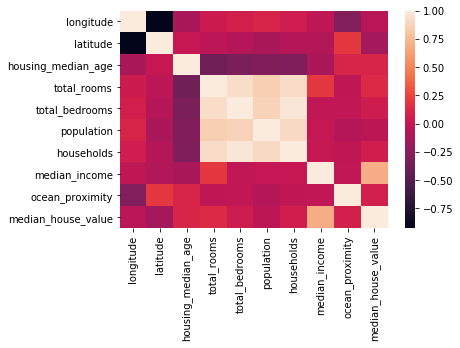

In [15]:
corr=df.corr()
sns.heatmap(corr)

In [16]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.20)

In [17]:
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(16512, 8)
(16512,)
(4128, 8)
(4128,)


### 6. Perform Linear Regression : 

In [18]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
ypred=LR.predict(Xtest)

In [20]:
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE=sqrt(mean_squared_error(ytest,ypred))

In [21]:
RMSE

71091.48618825359

Text(0, 0.5, ' Predicted median_house_value')

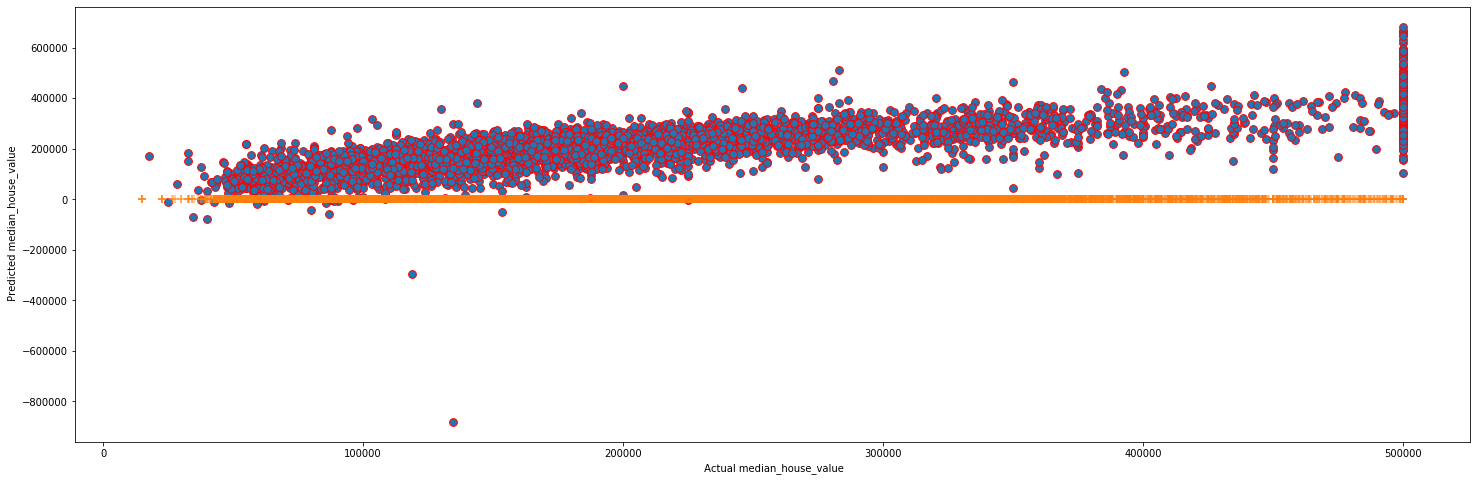

In [22]:
fig = plt.figure(figsize=(25,8))
plt.scatter(ytest,ypred,marker="o",edgecolors ="r",s=60)
plt.scatter(ytrain,Xtrain['median_income'],marker="+",s=50,alpha=0.5)
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")

### 7. Perform Decision Tree Regression :

In [23]:
from sklearn.tree import DecisionTreeRegressor
Dregr= DecisionTreeRegressor(max_depth=2)
Dregr.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [24]:
Dy_pred=Dregr.predict(X)

In [25]:
DT_RMSE=sqrt(mean_squared_error(y,Dy_pred))
DT_RMSE

85794.03857412074

### 8. Perform Random Forest Regression :

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [27]:
y_pred=regr.predict(X)

In [28]:
RFR_RMSE=sqrt(mean_squared_error(y,y_pred))
RFR_RMSE

15.246462781037694

### 9. Bonus exercise: Perform Linear Regression with one independent variable :

In [29]:
LX_train=Xtrain.drop(['longitude','latitude','housing_median_age','total_rooms',
                     'population','households','ocean_proximity'],axis=1)
LX_test=Xtest.drop(['longitude','latitude','housing_median_age','total_rooms',
                     'population','households','ocean_proximity'],axis=1)

In [30]:
LR.fit(LX_train,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
LRIy_pred=LR.predict(LX_test)

In [32]:
LX_RMSE=sqrt(mean_squared_error(ytest,LRIy_pred))
LX_RMSE

82977.78383609657

### Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

Text(0, 0.5, ' Predicted median_house_value')

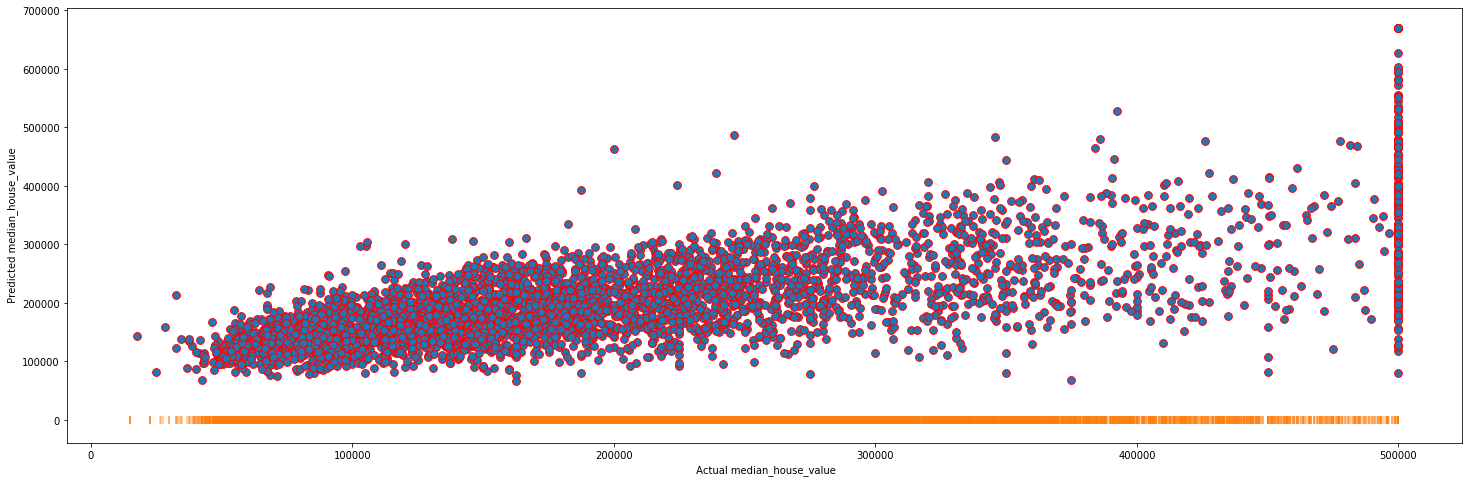

In [34]:
fig = plt.figure(figsize=(25,8))
plt.scatter(ytest,LRIy_pred,marker="o",edgecolors ="r",s=60)
plt.scatter(ytrain,LX_train,marker="|",s=50,alpha=0.5)
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")